In [ ]:
!pip install transformers

In [3]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering
import matplotlib.pyplot as plt

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to("cuda")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [59]:
def qa_image(image, question, local=False):
  if local == False:
    inputs = processor(image, question, return_tensors="pt").to("cuda")
  else:
    image = Image.open(image).convert('RGB')
    inputs = processor(image, question, return_tensors="pt").to("cuda")
  out = model.generate(**inputs, max_new_tokens=50)
  print("User Question: "+question)
  print(" ")
  print("Model Answer: "+str(processor.decode(out[0], skip_special_tokens=True)))
  plt.imshow(image)
  plt.show()
  return


User Question: where is this photo taken?
 
Model Answer: beach


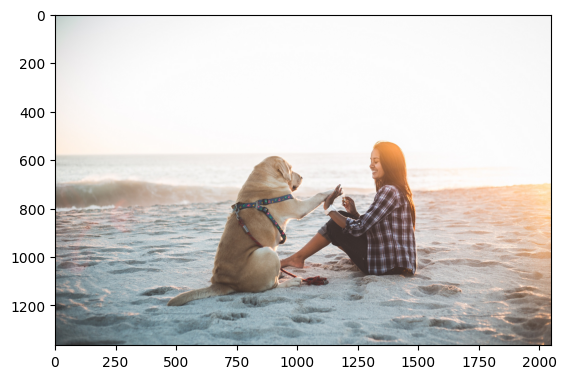

In [26]:
qa_image(raw_image, "where is this photo taken?")

User Question: what colour is this car?
 
Model Answer: red


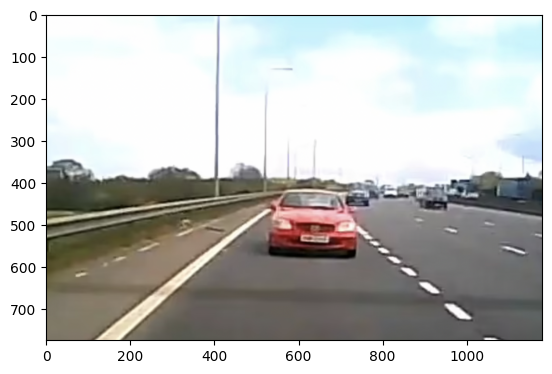

In [27]:
qa_image("/content/Screenshot 2023-07-27 at 08.40.51.png", "what colour is this car?", local=True)

User Question: does this image have a red car?
 
Model Answer: yes


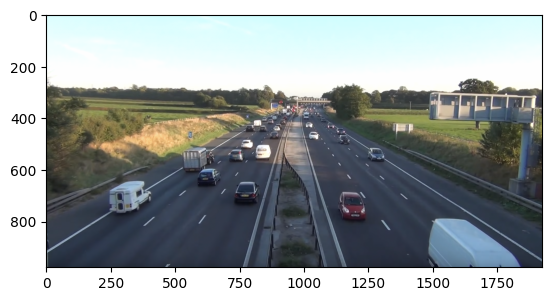

In [48]:
qa_image("/content/Screenshot 2023-07-28 at 09.45.39.png", "does this image have a red car?", local=True)

<h1> Lets try on a video! </h1>

In [43]:
import os
import locale
locale.getpreferredencoding = lambda: "UTF-8"

<h3> Use ffmpeg to split up the video into images</h3>

In [ ]:
!ffmpeg -i motorway.mp4 -vf fps=1 frames/out%d.png

In [50]:
cd frames

/content/frames


<h3> We now have single frames from the video as images! </h3>

In [51]:
ls

out10.png  out13.png  out16.png  out1.png  out4.png  out7.png
out11.png  out14.png  out17.png  out2.png  out5.png  out8.png
out12.png  out15.png  out18.png  out3.png  out6.png  out9.png


In [61]:
def qa_video(image, question):
  image = Image.open(image).convert('RGB')
  inputs = processor(image, question, return_tensors="pt").to("cuda")
  out = model.generate(**inputs, max_new_tokens=50)
  model_predication= str(processor.decode(out[0], skip_special_tokens=True))
  return model_predication, image

User's Question: does this video have a red car?
 
Model Answer: yes found one in frame 4


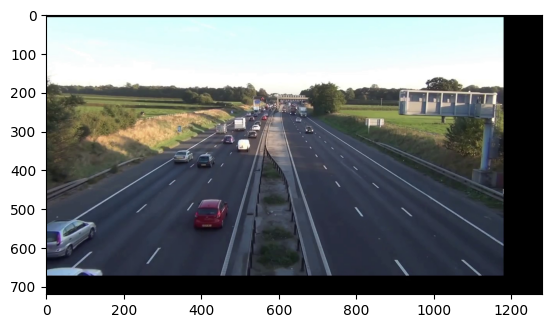

In [78]:
import os
import re

def extract_number(filename):
    match = re.search(r'\d+', filename)
    if match:
        return int(match.group())
    return None

filenames = os.listdir()

sorted_filenames = sorted(filenames, key=extract_number)

for filename in sorted_filenames:
    filepath = "/content/frames/"+filename
    q = "does this video have a red car?"
    model_prediction, image = qa_video(filepath, q)
    if model_prediction.lower() == "yes":
      print("User's Question: "+q)
      print(" ")
      print("Model Answer: "+str(model_prediction)+" found one in frame "+str(extract_number(filename)))
      plt.imshow(image)
      plt.show()
      break


